# Boltzmann, Bose-Einstein, and Fermi-Dirac

Vamos a construir y comparar estas tres distribuciones construyendo explícitamente todos los microestados. Lógicamente, solo funciona en casos muy pequeños, ya que el problema es salvajemente intratable. Aún así, usando los generadores bajo demanda de Python (o lazy lists de Haskell) el código queda muy elegante.

### Boltzmann  distribution

In [1]:
from itertools import product
from collections import Counter

In [2]:
Et = 7
n  = 7

Counter([ tuple(Counter(c).items()) for c in product(range(Et+1),repeat=n) if sum(c) == Et ]).most_common(1)[0][0]

((0, 3), (1, 3), (4, 1))

Generamos todas las configuraciones de $n$ partículas con posibles energías discretizadas hasta un máximo.

In [3]:
(Et+1)**n

2097152

In [4]:
from itertools import islice

list(islice(product(range(Et+1),repeat=n),20))

[(0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 1),
 (0, 0, 0, 0, 0, 0, 2),
 (0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 4),
 (0, 0, 0, 0, 0, 0, 5),
 (0, 0, 0, 0, 0, 0, 6),
 (0, 0, 0, 0, 0, 0, 7),
 (0, 0, 0, 0, 0, 1, 0),
 (0, 0, 0, 0, 0, 1, 1),
 (0, 0, 0, 0, 0, 1, 2),
 (0, 0, 0, 0, 0, 1, 3),
 (0, 0, 0, 0, 0, 1, 4),
 (0, 0, 0, 0, 0, 1, 5),
 (0, 0, 0, 0, 0, 1, 6),
 (0, 0, 0, 0, 0, 1, 7),
 (0, 0, 0, 0, 0, 2, 0),
 (0, 0, 0, 0, 0, 2, 1),
 (0, 0, 0, 0, 0, 2, 2),
 (0, 0, 0, 0, 0, 2, 3)]

Nos quedamos con las configuraciones que suman una cierta cantidad:

In [5]:
[c for c in product(range(Et+1),repeat=n) if sum(c) == Et][:20]

[(0, 0, 0, 0, 0, 0, 7),
 (0, 0, 0, 0, 0, 1, 6),
 (0, 0, 0, 0, 0, 2, 5),
 (0, 0, 0, 0, 0, 3, 4),
 (0, 0, 0, 0, 0, 4, 3),
 (0, 0, 0, 0, 0, 5, 2),
 (0, 0, 0, 0, 0, 6, 1),
 (0, 0, 0, 0, 0, 7, 0),
 (0, 0, 0, 0, 1, 0, 6),
 (0, 0, 0, 0, 1, 1, 5),
 (0, 0, 0, 0, 1, 2, 4),
 (0, 0, 0, 0, 1, 3, 3),
 (0, 0, 0, 0, 1, 4, 2),
 (0, 0, 0, 0, 1, 5, 1),
 (0, 0, 0, 0, 1, 6, 0),
 (0, 0, 0, 0, 2, 0, 5),
 (0, 0, 0, 0, 2, 1, 4),
 (0, 0, 0, 0, 2, 2, 3),
 (0, 0, 0, 0, 2, 3, 2),
 (0, 0, 0, 0, 2, 4, 1)]

In [6]:
[Counter(c) for c in product(range(Et+1),repeat=n) if sum(c) == Et][:20]

[Counter({0: 6, 7: 1}),
 Counter({0: 5, 1: 1, 6: 1}),
 Counter({0: 5, 2: 1, 5: 1}),
 Counter({0: 5, 3: 1, 4: 1}),
 Counter({0: 5, 4: 1, 3: 1}),
 Counter({0: 5, 5: 1, 2: 1}),
 Counter({0: 5, 6: 1, 1: 1}),
 Counter({0: 6, 7: 1}),
 Counter({0: 5, 1: 1, 6: 1}),
 Counter({0: 4, 1: 2, 5: 1}),
 Counter({0: 4, 1: 1, 2: 1, 4: 1}),
 Counter({0: 4, 1: 1, 3: 2}),
 Counter({0: 4, 1: 1, 4: 1, 2: 1}),
 Counter({0: 4, 1: 2, 5: 1}),
 Counter({0: 5, 1: 1, 6: 1}),
 Counter({0: 5, 2: 1, 5: 1}),
 Counter({0: 4, 2: 1, 1: 1, 4: 1}),
 Counter({0: 4, 2: 2, 3: 1}),
 Counter({0: 4, 2: 2, 3: 1}),
 Counter({0: 4, 2: 1, 4: 1, 1: 1})]

In [7]:
def totup(c):
    return tuple([c[k] for k in range(Et+1)])

Counter([ totup(Counter(c)) for c in product(range(Et+1),repeat=n) if sum(c) == Et ])

Counter({(6, 0, 0, 0, 0, 0, 0, 1): 7,
         (5, 1, 0, 0, 0, 0, 1, 0): 42,
         (5, 0, 1, 0, 0, 1, 0, 0): 42,
         (5, 0, 0, 1, 1, 0, 0, 0): 42,
         (4, 2, 0, 0, 0, 1, 0, 0): 105,
         (4, 1, 1, 0, 1, 0, 0, 0): 210,
         (4, 1, 0, 2, 0, 0, 0, 0): 105,
         (4, 0, 2, 1, 0, 0, 0, 0): 105,
         (3, 3, 0, 0, 1, 0, 0, 0): 140,
         (3, 2, 1, 1, 0, 0, 0, 0): 420,
         (3, 1, 3, 0, 0, 0, 0, 0): 140,
         (2, 4, 0, 1, 0, 0, 0, 0): 105,
         (2, 3, 2, 0, 0, 0, 0, 0): 210,
         (1, 5, 1, 0, 0, 0, 0, 0): 42,
         (0, 7, 0, 0, 0, 0, 0, 0): 1})

In [8]:
# 20 s

Et = 8
n  = 8

Counter([ totup(Counter(c)) for c in product(range(Et+1),repeat=n) if sum(c) == Et ]).most_common(5)

[((3, 3, 1, 1, 0, 0, 0, 0, 0), 1120),
 ((4, 2, 1, 0, 1, 0, 0, 0, 0), 840),
 ((4, 1, 2, 1, 0, 0, 0, 0, 0), 840),
 ((3, 2, 3, 0, 0, 0, 0, 0, 0), 560),
 ((4, 2, 0, 2, 0, 0, 0, 0, 0), 420)]

In [9]:
Et = 5
n  = 8

Counter([ totup(Counter(c)) for c in product(range(Et+1),repeat=n) if sum(c) == Et ]).most_common()

[((4, 3, 1, 0, 0, 0), 280),
 ((5, 2, 0, 1, 0, 0), 168),
 ((5, 1, 2, 0, 0, 0), 168),
 ((6, 1, 0, 0, 1, 0), 56),
 ((6, 0, 1, 1, 0, 0), 56),
 ((3, 5, 0, 0, 0, 0), 56),
 ((7, 0, 0, 0, 0, 1), 8)]

In [10]:
Et = 6
n  = 9

Counter([ totup(Counter(c)) for c in product(range(Et+1),repeat=n) if sum(c) == Et ]).most_common()

[((5, 2, 2, 0, 0, 0, 0), 756),
 ((4, 4, 1, 0, 0, 0, 0), 630),
 ((6, 1, 1, 1, 0, 0, 0), 504),
 ((5, 3, 0, 1, 0, 0, 0), 504),
 ((6, 2, 0, 0, 1, 0, 0), 252),
 ((6, 0, 3, 0, 0, 0, 0), 84),
 ((3, 6, 0, 0, 0, 0, 0), 84),
 ((7, 1, 0, 0, 0, 1, 0), 72),
 ((7, 0, 1, 0, 1, 0, 0), 72),
 ((7, 0, 0, 2, 0, 0, 0), 36),
 ((8, 0, 0, 0, 0, 0, 1), 9)]

In [11]:
Et = 9
n  = 6

c = Counter([ totup(Counter(c)) for c in product(range(Et+1),repeat=n) if sum(c) == Et ]).most_common()

c

[((2, 2, 1, 0, 0, 1, 0, 0, 0, 0), 180),
 ((2, 2, 0, 1, 1, 0, 0, 0, 0, 0), 180),
 ((2, 1, 2, 0, 1, 0, 0, 0, 0, 0), 180),
 ((2, 1, 1, 2, 0, 0, 0, 0, 0, 0), 180),
 ((1, 2, 2, 1, 0, 0, 0, 0, 0, 0), 180),
 ((3, 1, 1, 0, 0, 0, 1, 0, 0, 0), 120),
 ((3, 1, 0, 1, 0, 1, 0, 0, 0, 0), 120),
 ((3, 0, 1, 1, 1, 0, 0, 0, 0, 0), 120),
 ((1, 3, 1, 0, 1, 0, 0, 0, 0, 0), 120),
 ((3, 2, 0, 0, 0, 0, 0, 1, 0, 0), 60),
 ((3, 1, 0, 0, 2, 0, 0, 0, 0, 0), 60),
 ((3, 0, 2, 0, 0, 1, 0, 0, 0, 0), 60),
 ((2, 3, 0, 0, 0, 0, 1, 0, 0, 0), 60),
 ((2, 0, 3, 1, 0, 0, 0, 0, 0, 0), 60),
 ((1, 3, 0, 2, 0, 0, 0, 0, 0, 0), 60),
 ((4, 1, 0, 0, 0, 0, 0, 0, 1, 0), 30),
 ((4, 0, 1, 0, 0, 0, 0, 1, 0, 0), 30),
 ((4, 0, 0, 1, 0, 0, 1, 0, 0, 0), 30),
 ((4, 0, 0, 0, 1, 1, 0, 0, 0, 0), 30),
 ((1, 4, 0, 0, 0, 1, 0, 0, 0, 0), 30),
 ((1, 1, 4, 0, 0, 0, 0, 0, 0, 0), 30),
 ((0, 4, 1, 1, 0, 0, 0, 0, 0, 0), 30),
 ((3, 0, 0, 3, 0, 0, 0, 0, 0, 0), 20),
 ((0, 3, 3, 0, 0, 0, 0, 0, 0, 0), 20),
 ((5, 0, 0, 0, 0, 0, 0, 0, 0, 1), 6),
 ((0, 5, 0, 0, 1,

In [12]:
import numpy as np

def boltz(c):
    v,n = zip(*c)
    return np.array(v) * np.array(n).reshape(-1,1)

b = boltz(c)
b

array([[360, 360, 180,   0,   0, 180,   0,   0,   0,   0],
       [360, 360,   0, 180, 180,   0,   0,   0,   0,   0],
       [360, 180, 360,   0, 180,   0,   0,   0,   0,   0],
       [360, 180, 180, 360,   0,   0,   0,   0,   0,   0],
       [180, 360, 360, 180,   0,   0,   0,   0,   0,   0],
       [360, 120, 120,   0,   0,   0, 120,   0,   0,   0],
       [360, 120,   0, 120,   0, 120,   0,   0,   0,   0],
       [360,   0, 120, 120, 120,   0,   0,   0,   0,   0],
       [120, 360, 120,   0, 120,   0,   0,   0,   0,   0],
       [180, 120,   0,   0,   0,   0,   0,  60,   0,   0],
       [180,  60,   0,   0, 120,   0,   0,   0,   0,   0],
       [180,   0, 120,   0,   0,  60,   0,   0,   0,   0],
       [120, 180,   0,   0,   0,   0,  60,   0,   0,   0],
       [120,   0, 180,  60,   0,   0,   0,   0,   0,   0],
       [ 60, 180,   0, 120,   0,   0,   0,   0,   0,   0],
       [120,  30,   0,   0,   0,   0,   0,   0,  30,   0],
       [120,   0,  30,   0,   0,   0,   0,  30,   0,   0

In [13]:
b = boltz(c).sum(axis=0)
b

array([4290, 2970, 1980, 1260,  756,  420,  210,   90,   30,    6])

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

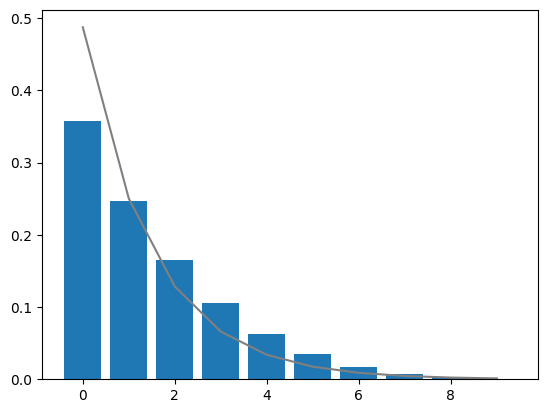

In [15]:
e = np.arange(0,Et+1)

Em = Et/n

B = np.exp(-e/Em)

plt.bar(e,b/sum(b));
plt.plot(e,B/sum(B), color='gray');

### Objetos indistinguibles

Hacemos todas las configuraciones equiprobables:

In [16]:
def bose(c):
    v,n = zip(*c)
    return np.array(v)

b = bose(c)
b

array([[2, 2, 1, 0, 0, 1, 0, 0, 0, 0],
       [2, 2, 0, 1, 1, 0, 0, 0, 0, 0],
       [2, 1, 2, 0, 1, 0, 0, 0, 0, 0],
       [2, 1, 1, 2, 0, 0, 0, 0, 0, 0],
       [1, 2, 2, 1, 0, 0, 0, 0, 0, 0],
       [3, 1, 1, 0, 0, 0, 1, 0, 0, 0],
       [3, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [3, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 3, 1, 0, 1, 0, 0, 0, 0, 0],
       [3, 2, 0, 0, 0, 0, 0, 1, 0, 0],
       [3, 1, 0, 0, 2, 0, 0, 0, 0, 0],
       [3, 0, 2, 0, 0, 1, 0, 0, 0, 0],
       [2, 3, 0, 0, 0, 0, 1, 0, 0, 0],
       [2, 0, 3, 1, 0, 0, 0, 0, 0, 0],
       [1, 3, 0, 2, 0, 0, 0, 0, 0, 0],
       [4, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [4, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [4, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [4, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [1, 4, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 1, 4, 0, 0, 0, 0, 0, 0, 0],
       [0, 4, 1, 1, 0, 0, 0, 0, 0, 0],
       [3, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 3, 3, 0, 0, 0, 0, 0, 0, 0],
       [5, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 5, 0, 0, 1, 0,

In [17]:
be = bose(c).sum(axis=0)
be

array([59, 40, 23, 14,  8,  5,  3,  2,  1,  1])

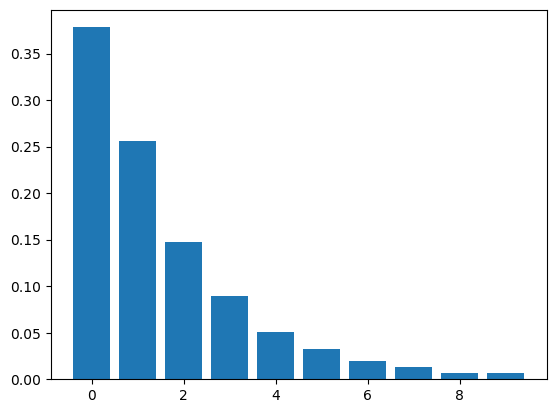

In [18]:
e = np.arange(0,Et+1)

plt.bar(e,be/sum(be));

### Exclusion Principle

Quitamos todas las configuraciones anteriores que tienen más de dos objetos con la misma energía.

In [19]:
def fermi(c):
    v,n = zip(*c)
    v = np.array(v)
    return v[np.all(b<=2,axis=1)]

f = fermi(c)
f

array([[2, 2, 1, 0, 0, 1, 0, 0, 0, 0],
       [2, 2, 0, 1, 1, 0, 0, 0, 0, 0],
       [2, 1, 2, 0, 1, 0, 0, 0, 0, 0],
       [2, 1, 1, 2, 0, 0, 0, 0, 0, 0],
       [1, 2, 2, 1, 0, 0, 0, 0, 0, 0]])

In [20]:
fd = fermi(c).sum(axis=0)
fd

array([9, 8, 6, 4, 2, 1, 0, 0, 0, 0])

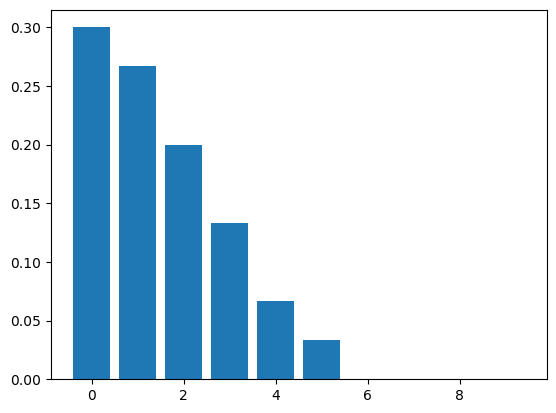

In [21]:
e = np.arange(0,Et+1)

plt.bar(e,fd/sum(fd));

### Degenerate levels

TBD

---
[Alberto Ruiz](http://dis.um.es/profesores/alberto), 2017/11